In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.model_selection import train_test_split

In [14]:
# Distribution plotting variables

left  = 0.125  # the left side of the subplots of the figure
right = 0.65   # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.3   # the amount of height reserved for white space between subplots

fig_rows = 1
fig_cols = 4
plot_height = 3
plot_width = 14

plot_locations = [
    0,1,2,3
]

data_types = [
    'weather_bin_month',
    'air.2m',
    'rhum.2m',
    'veg'
]

plot_titles = [
    'Month',
    'Air temperature',
    'Relative humidity',
    'Vegitation coverage',
]

weather_variable_labels = [
    'Month',
    'Temp. (K)',
    'Humidity (%)',
    'Coverage (%)'
]

y_scales = [
    'linear',
    'linear',
    'linear',
    'linear'
]

xlabels = weather_variable_labels
ylabels = ['Fraction'] * len(xlabels)

In [12]:
def two_sample_density_plot(
    plot_location, 
    parent_data, 
    sample_data, 
    data_type, 
    title, 
    xlabel, 
    ylabel, 
    y_scale
):
    parent_values, parent_base = np.histogram(parent_data[data_type], bins=40)
    sample_values, sample_base = np.histogram(sample_data[data_type], bins=40)
    
    parent_cumulative = np.cumsum(parent_values) / len(parent_data)
    sample_cumulative = np.cumsum(sample_values) / len(sample_data)

    ax[plot_location].plot(parent_base[:-1], (parent_values/len(parent_data)), label ='Sample A', color = "darkorange")
    ax[plot_location].plot(sample_base[:-1], (sample_values/len(sample_data)), linestyle="--", label ='Sample B', color = "royalblue")
    ax[plot_location].tick_params(labelsize=12)
    ax[plot_location].set_title(title, fontsize=18)
    ax[plot_location].set_xlabel(xlabel, fontsize=14)
    ax[plot_location].set_ylabel(ylabel, fontsize=15)
    ax[plot_location].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[plot_location].set_yscale(y_scale)
    
    ax[plot_location].legend()

In [4]:
input_sample1_file = '../data/stratified_training_data/1992-2015_training_data_added_features_n500000_ks_pval0.3.1.csv'
input_sample2_file = '../data/stratified_training_data/1992-2015_training_data_added_features_n500000_ks_pval0.3.2.csv'

In [5]:
stratified_sample1 = pd.read_csv(input_sample1_file)
stratified_sample2 = pd.read_csv(input_sample2_file)

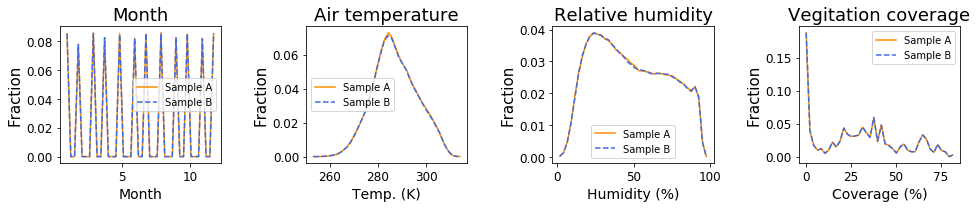

In [15]:
# Make density plots
fig, ax = plt.subplots(fig_rows, fig_cols, figsize=(plot_width, plot_height))
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

for i in range(len(plot_locations)):
    ax[plot_locations[i]] = two_sample_density_plot(plot_locations[i], stratified_sample1, stratified_sample2, data_types[i], plot_titles[i], xlabels[i], ylabels[i], y_scales[i])

plt.tight_layout()
plt.savefig('../figures/stratified_sample_comparison.png', bbox_inches='tight')
plt.show()

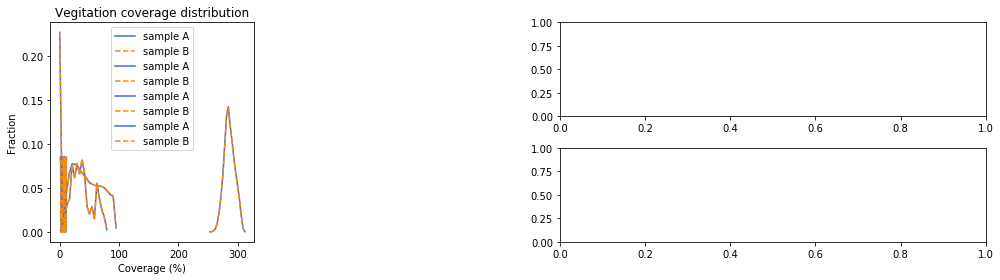

In [23]:
plt.subplots(2,2,figsize=(14,4))

plt.subplot(1, 4, 1)

parent_values, parent_base = np.histogram(stratified_sample1['weather_bin_month'], bins=20)
sample_values, sample_base = np.histogram(stratified_sample2['weather_bin_month'], bins=20)

plt.plot(
    parent_base[:-1], 
    (parent_values/len(stratified_sample1)),
    color = 'royalblue',
    label = 'sample A'
)
plt.plot(
    sample_base[:-1], 
    (sample_values/len(stratified_sample2)),
    color = 'darkorange',
    label = 'sample B',
    linestyle = '--'
)

plt.xlabel('Month')
plt.ylabel('Fraction')
plt.title('Month distribution')
plt.legend()

parent_values, parent_base = np.histogram(stratified_sample1['air.2m'], bins=20)
sample_values, sample_base = np.histogram(stratified_sample2['air.2m'], bins=20)

plt.plot(
    parent_base[:-1], 
    (parent_values/len(stratified_sample1)),
    color = 'royalblue',
    label = 'sample A'
)
plt.plot(
    sample_base[:-1], 
    (sample_values/len(stratified_sample2)),
    color = 'darkorange',
    label = 'sample B',
    linestyle = '--'
)

plt.xlabel('Air temperature (K)')
plt.ylabel('Fraction')
plt.title('Air temperature distribution')
plt.legend()
    
parent_values, parent_base = np.histogram(stratified_sample1['rhum.2m'], bins=20)
sample_values, sample_base = np.histogram(stratified_sample2['rhum.2m'], bins=20)

plt.plot(
    parent_base[:-1], 
    (parent_values/len(stratified_sample1)),
    color = 'royalblue',
    label = 'sample A'
)
plt.plot(
    sample_base[:-1], 
    (sample_values/len(stratified_sample2)),
    color = 'darkorange',
    label = 'sample B',
    linestyle = '--'
)

plt.xlabel('Relative humidity (%)')
plt.ylabel('Fraction')
plt.title('Relative humidity distribution')
plt.legend()
    
parent_values, parent_base = np.histogram(stratified_sample1['veg'], bins=20)
sample_values, sample_base = np.histogram(stratified_sample2['veg'], bins=20)

plt.plot(
    parent_base[:-1], 
    (parent_values/len(stratified_sample1)),
    color = 'royalblue',
    label = 'sample A'
)
plt.plot(
    sample_base[:-1], 
    (sample_values/len(stratified_sample2)),
    color = 'darkorange',
    label = 'sample B',
    linestyle = '--'
)

plt.xlabel('Coverage (%)')
plt.ylabel('Fraction')
plt.title('Vegitation coverage distribution')
plt.legend()


plt.tight_layout()
plt.savefig('../figures/stratified_sample_comparison.png', bbox_inches='tight')
plt.show()